<a href="https://colab.research.google.com/github/vxbrin/DataScienceCoder/blob/main/Entrega_Valeria_Brinatti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv ("https://raw.githubusercontent.com/vxbrin/DataScienceCoder/main/worker_productivity.csv")
df.head()




,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [23]:
df.describe()




,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.737176,15.058814,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.744194
std,3.463963,0.100316,10.947226,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.177760
min,1.000000,0.100000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.200000
25%,3.000000,0.700000,3.900000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.700000
50%,6.000000,0.800000,15.300000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.800000
75%,9.000000,0.800000,24.300000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.900000
max,12.000000,0.800000,54.600000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.100000


In [25]:
resumen=df.describe().round(1)
resumen

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.0,1197.0,1197.0,691.0,1197.0,1197.0,1197.0,1197.0,1197.0,1197.0,1197.0
mean,6.4,0.7,15.1,1190.5,4567.5,38.2,0.7,0.4,0.2,34.6,0.7
std,3.5,0.1,10.9,1837.5,3348.8,160.2,12.7,3.3,0.4,22.2,0.2
min,1.0,0.1,2.9,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.2
25%,3.0,0.7,3.9,774.5,1440.0,0.0,0.0,0.0,0.0,9.0,0.7
50%,6.0,0.8,15.3,1039.0,3960.0,0.0,0.0,0.0,0.0,34.0,0.8
75%,9.0,0.8,24.3,1252.5,6960.0,50.0,0.0,0.0,0.0,57.0,0.9
max,12.0,0.8,54.6,23122.0,25920.0,3600.0,300.0,45.0,2.0,89.0,1.1


Descripcion de las columnas:
*   date: Date in MM-DD-YYYY
*   day: Day of the Week
*   quarter: A portion of the month. A month was divided into four quarters
*   team_no: Associated team number with the instance
*   no_of_style_change: Number of changes in the style of a particular product
*   targeted_productivity: Targeted productivity set by the Authority for each team for each day.
*   smv: Standard Minute Value, it is the allocated time for a task
*   wip: Work in progress. Includes the number of unfinished items for products
*   over_time: Represents the amount of overtime by each team in minutes
*   incentive: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
*   idle_time: The amount of time when the production was interrupted due to several reasons
*   idle_men: The number of workers who were idle due to production interruption
*   actual_productivity: The actual % of productivity that was delivered by the workers. It ranges from 0-1.



**Conclusiones:**
- La columna Wip esta un 58% vacia. Se podría asumir que son 0 ya que son prendas inacabadas pero viendo el máximo resulta extraño que tantos dias sea 0 y otro día 23 mil. Esta columna será desestimada por la falta de representatividad en la cantidad y calidad de información.

In [41]:
print(df.columns)


Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


In [42]:
num_missing=df.isnull().sum()
num_missing

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
over_time,0
incentive,0
idle_time,0


Graficos para analizar datos

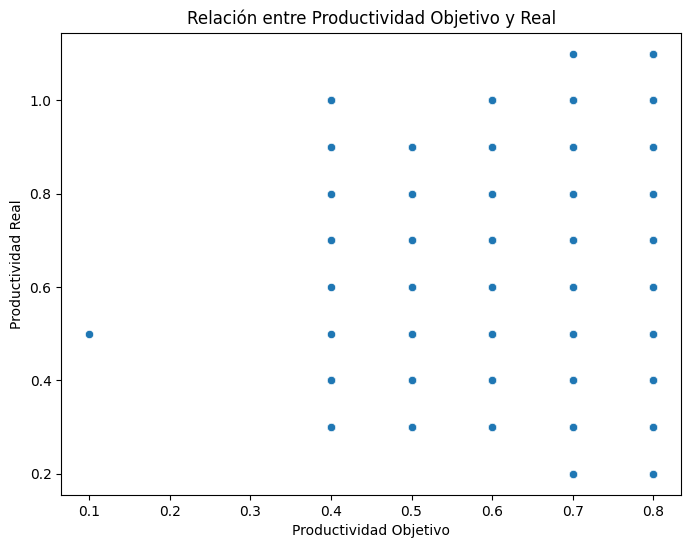

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='targeted_productivity', y='actual_productivity', data=df)
plt.title('Relación entre Productividad Objetivo y Real')
plt.xlabel('Productividad Objetivo')
plt.ylabel('Productividad Real')
plt.show()

Hay un valor extraño en la productividad objetivo, pareciera un error ya que es demasiado bajo y en un dia de semana. Voy a eliminarlo.

In [47]:
low_target_productivity = df[df['targeted_productivity'] < 0.2]
print(low_target_productivity)

         date   quarter department       day  team  targeted_productivity  \
633  2/5/2015  Quarter1     sweing  Thursday     7                    0.1   

      smv  over_time  incentive  idle_time  idle_men  no_of_style_change  \
633  24.3       6960          0        0.0         0                   0   

     no_of_workers  actual_productivity  
633           58.0                  0.5  


In [49]:
df = df.drop(low_target_productivity.index)
print(df[df['targeted_productivity'] < 0.2])


Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


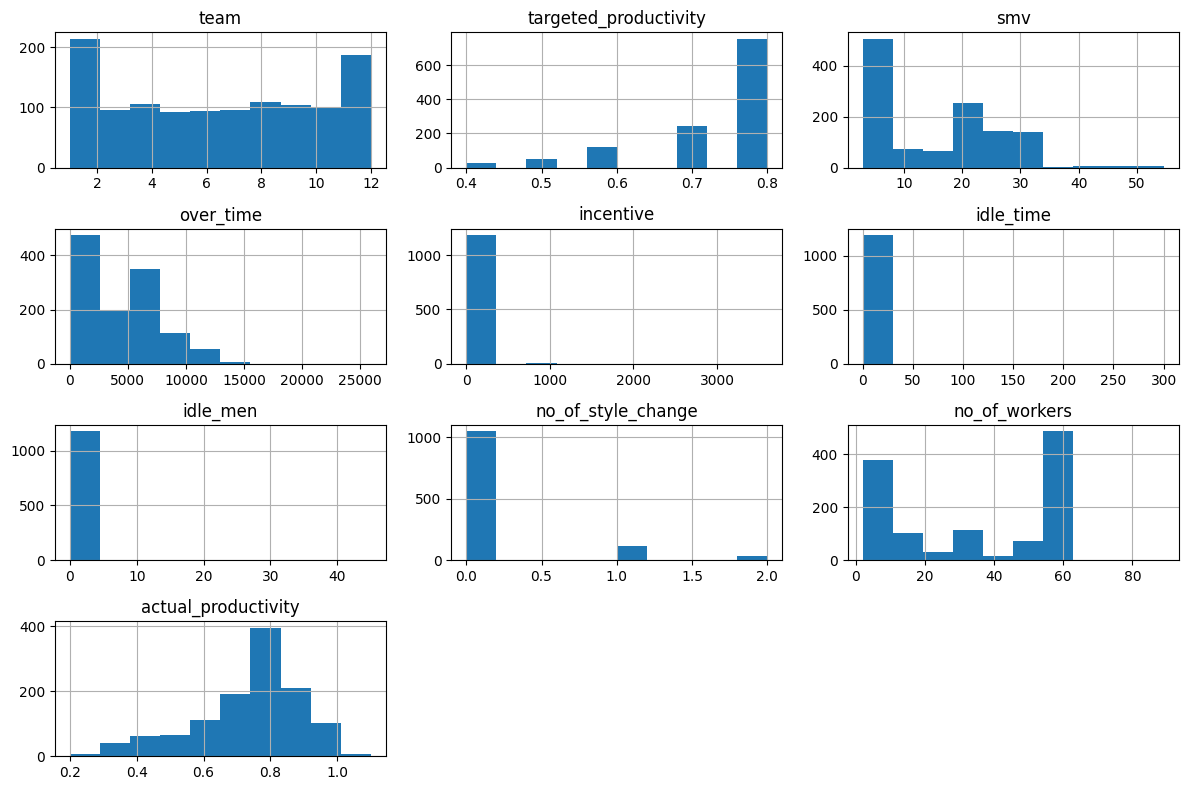

In [50]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

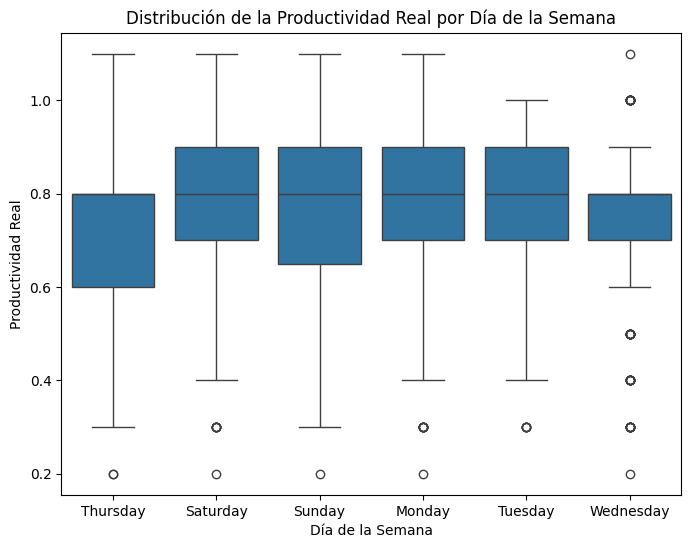

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='actual_productivity', data=df)
plt.title('Distribución de la Productividad Real por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Productividad Real')
plt.show()

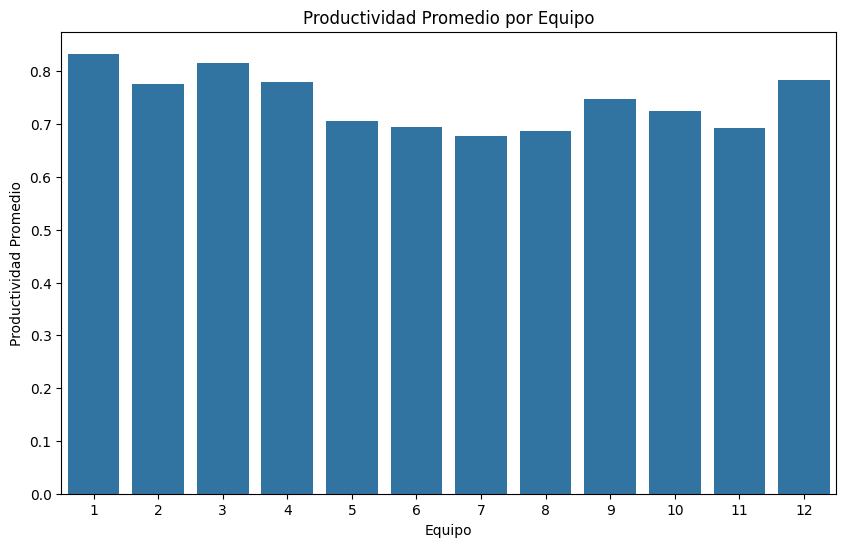

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='team', y='actual_productivity', data=df, errorbar=None)
plt.title('Productividad Promedio por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Productividad Promedio')
plt.show()

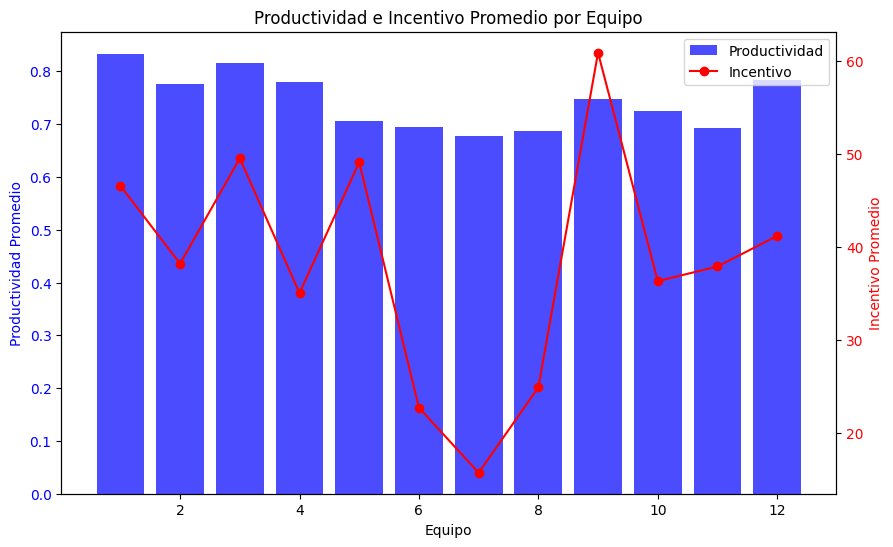

In [59]:
# Calcula la productividad promedio y el incentivo promedio por equipo
team_productivity = df.groupby('team')['actual_productivity'].mean()
team_incentive = df.groupby('team')['incentive'].mean()

# Crea un DataFrame con los resultados
team_data = pd.DataFrame({'Productividad Promedio': team_productivity, 'Incentivo Promedio': team_incentive})

# Grafica los resultados
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barra para la productividad promedio
ax1.bar(team_data.index, team_data['Productividad Promedio'], color='blue', alpha=0.7, label='Productividad')
ax1.set_xlabel('Equipo')
ax1.set_ylabel('Productividad Promedio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Segundo eje para el incentivo promedio
ax2 = ax1.twinx()
ax2.plot(team_data.index, team_data['Incentivo Promedio'], color='red', marker='o', label='Incentivo')
ax2.set_ylabel('Incentivo Promedio', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titulo y leyenda
plt.title('Productividad e Incentivo Promedio por Equipo')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

Conclusion: Los incentivos no estan generando los resultados deseados. Un mayor nivel de incentivo no se asocia a mayor productividad en el equipo